### Requied imports

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statistics import mean
import scikitplot as skplt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

###  Read and visualize data

In [233]:
# Read the CSV file into a DataFrame
dataFrame = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [234]:
dataFrame.shape

(299, 13)

In [235]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Check for missing  values

In [236]:
dataFrame.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### EDA

In [237]:
values_count = dataFrame.pivot_table(index = ['DEATH_EVENT'], aggfunc ='size')
values_count

DEATH_EVENT
0    203
1     96
dtype: int64

In [238]:
cdf= dataFrame.copy()
cdf.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [239]:
cdf.loc[(dataFrame['DEATH_EVENT'] ==0), 'DEATH_EVENT'] = 'Survival'
cdf.loc[(dataFrame['DEATH_EVENT'] ==1), 'DEATH_EVENT'] = 'Death'

Text(0, 0.5, 'Amount')

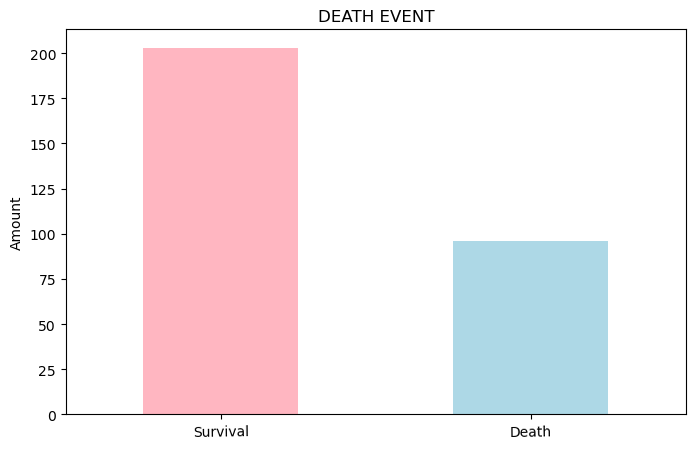

In [240]:
#plotting bar chart.
plt.figure(figsize=(8,5))
fig = cdf.DEATH_EVENT.value_counts().plot(kind = 'bar', color=['lightpink','lightblue'])
fig.set_xticklabels(labels=['Survival','Death'], rotation=0.9);
plt.title("DEATH EVENT")
plt.ylabel("Amount")

### Age and Death event

<Figure size 2000x1000 with 0 Axes>

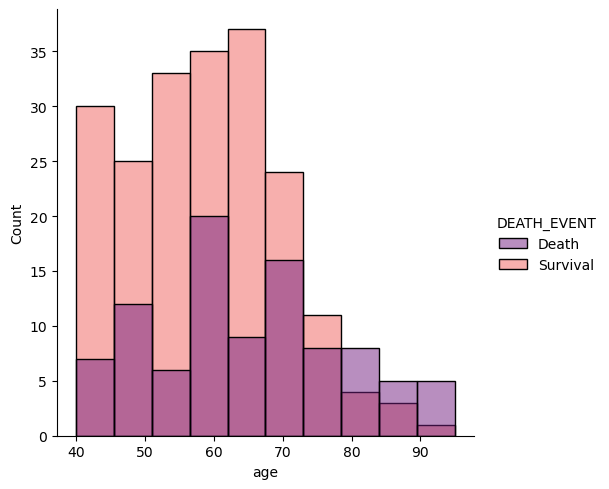

In [241]:
plt.figure(figsize=(20,10))
sns.displot(x='age', hue='DEATH_EVENT', data=cdf, palette='magma')

### Relation between anaemia and death event

<AxesSubplot:ylabel='anaemia'>

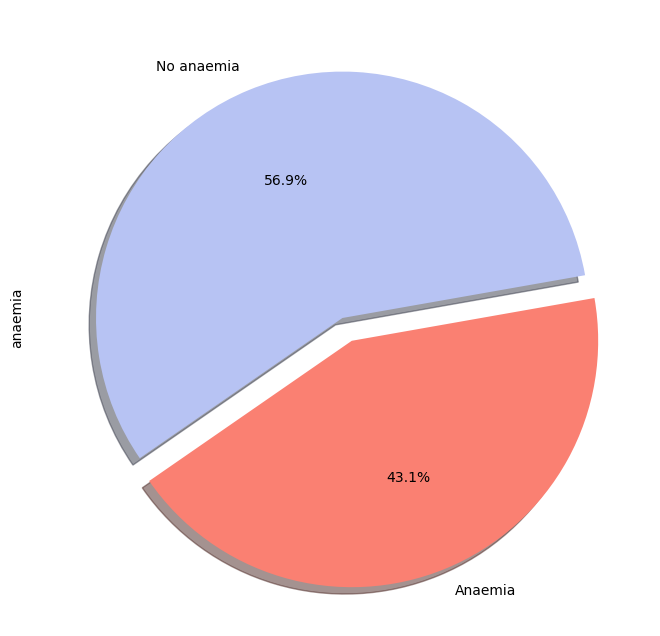

In [242]:
#visualizing in Pie chart
plt.figure(figsize=(10,8))
labels =  "No anaemia","Anaemia"

cdf.anaemia.value_counts().plot.pie( autopct='%1.1f%%', startangle = 10,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#B7C3F3','salmon'])

Text(0.5, 0, 'Count')

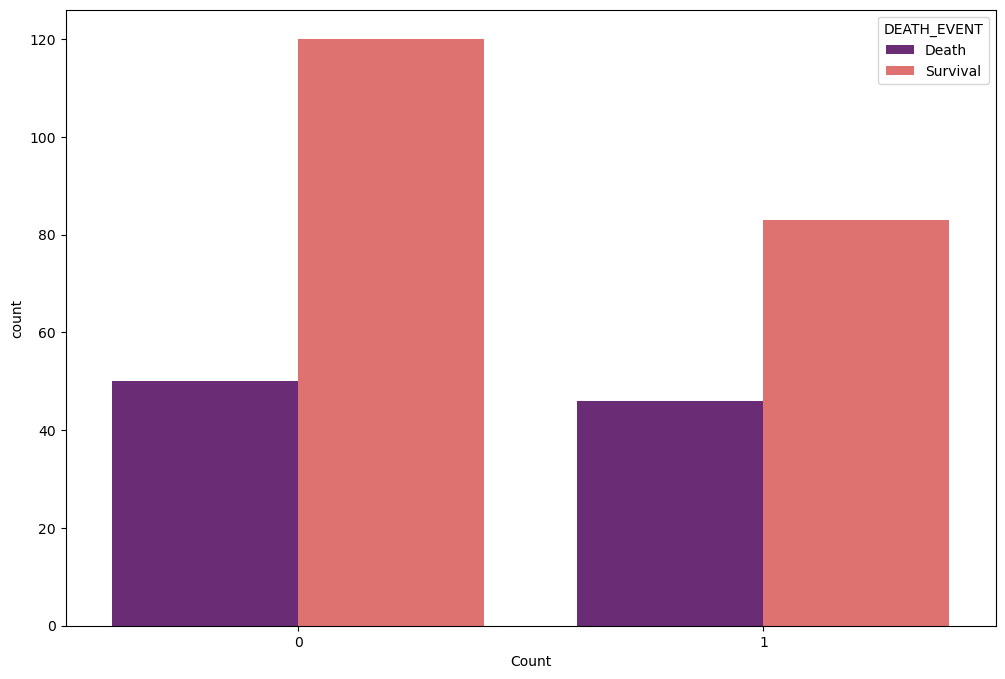

In [243]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='anaemia', hue= 'DEATH_EVENT', palette= 'magma')
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between Blood pressure and death event

<AxesSubplot:ylabel='high_blood_pressure'>

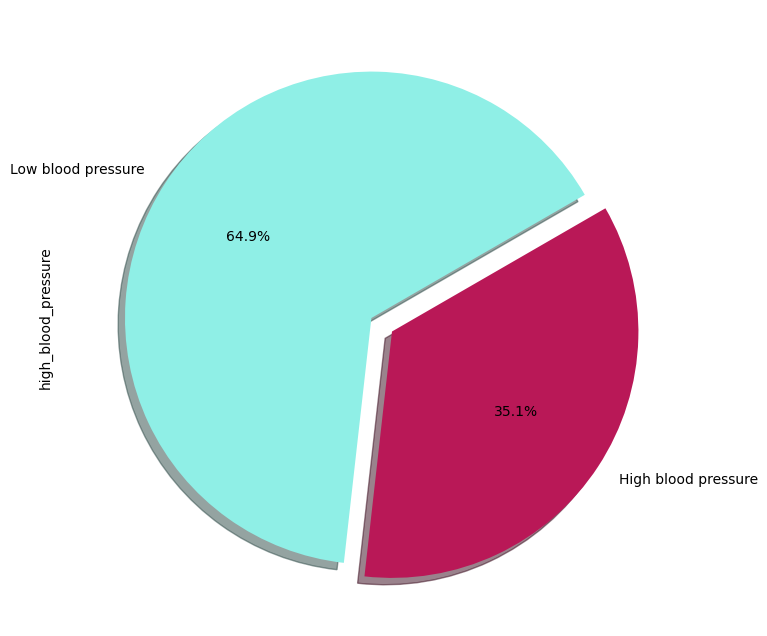

In [244]:
plt.figure(figsize=(10,8))
labels =  "Low blood pressure","High blood pressure"

cdf.high_blood_pressure.value_counts().plot.pie( autopct='%1.1f%%', startangle = 30,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#B91857'])

Text(0.5, 0, 'Count')

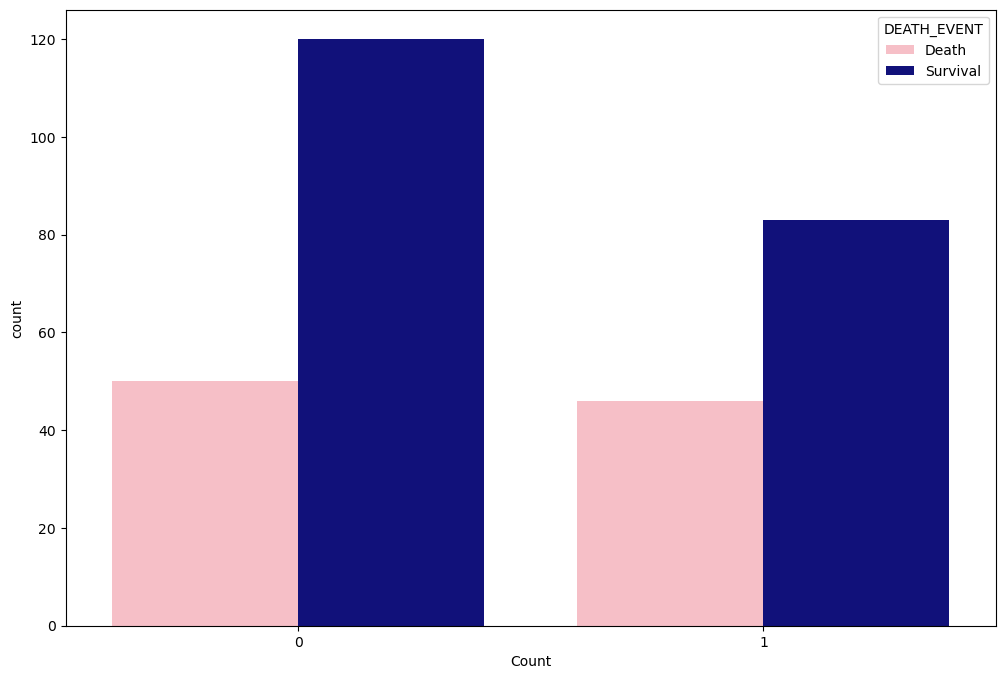

In [245]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='anaemia', hue= 'DEATH_EVENT', palette= ['lightpink','darkblue'])
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between Diabetes and death event

<AxesSubplot:ylabel='diabetes'>

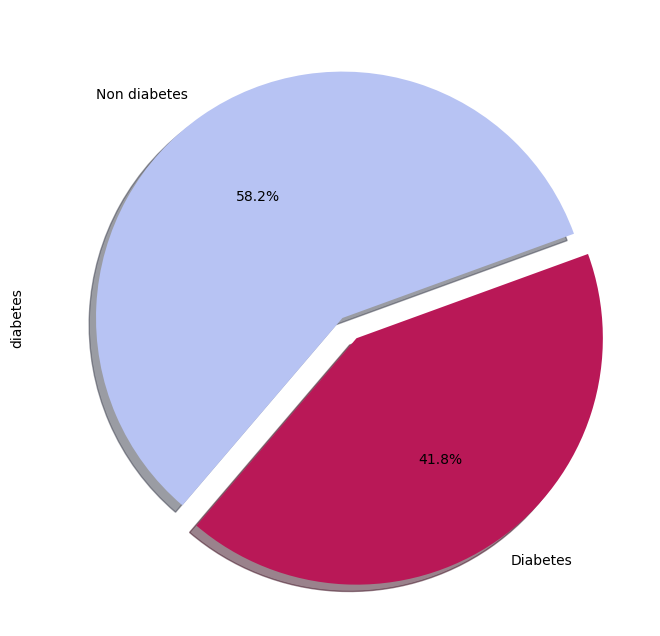

In [246]:
plt.figure(figsize=(10,8))
labels =  "Non diabetes","Diabetes"

cdf.diabetes.value_counts().plot.pie( autopct='%1.1f%%', startangle = 20,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#B7C3F3','#B91857'])

Text(0.5, 0, 'Count')

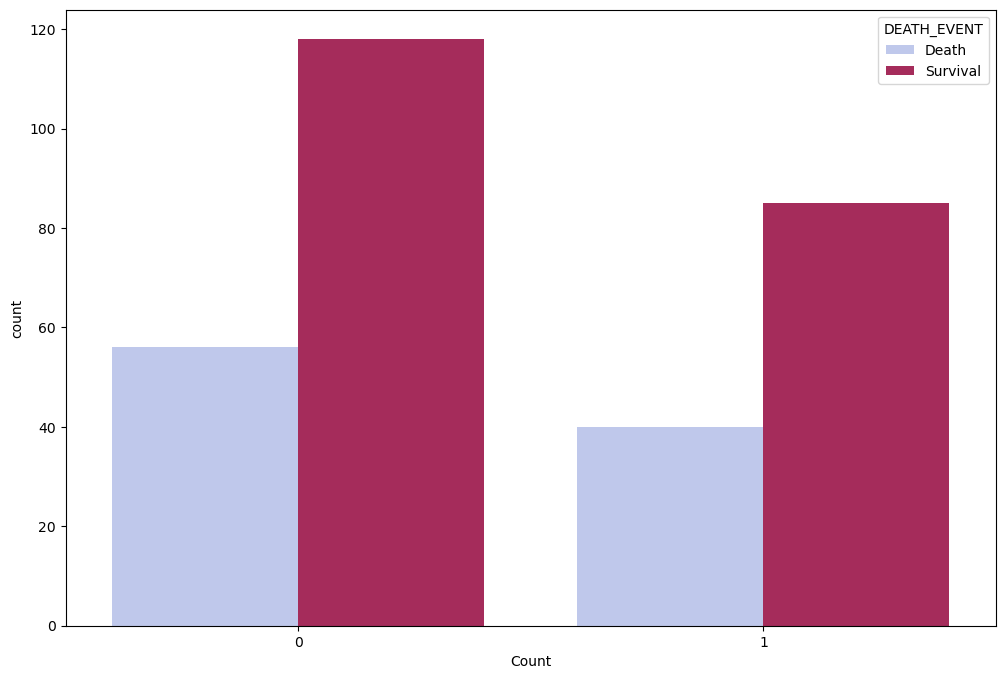

In [247]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='diabetes', hue= 'DEATH_EVENT',palette=['#B7C3F3','#B91857'])
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between gender and death event

<AxesSubplot:ylabel='sex'>

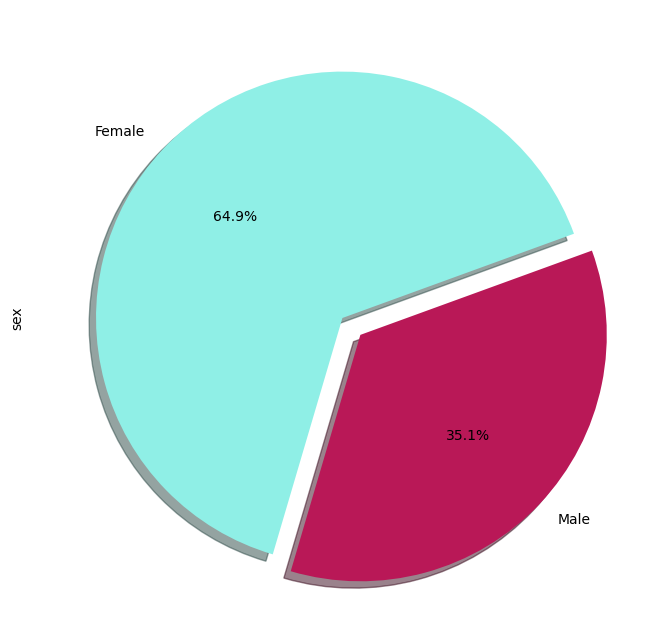

In [248]:
plt.figure(figsize=(10,8))
labels =  "Female","Male"

cdf.sex.value_counts().plot.pie( autopct='%1.1f%%', startangle = 20,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#B91857'])

Text(0.5, 0, 'Count')

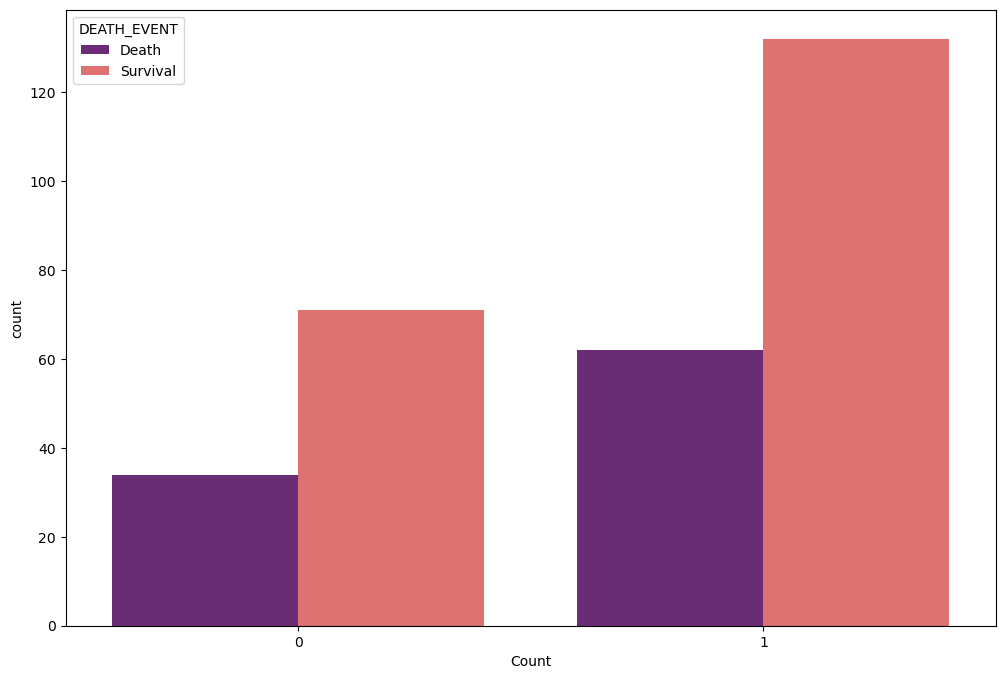

In [249]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='sex', hue= 'DEATH_EVENT', palette= 'magma')
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between smoking and death event

<AxesSubplot:ylabel='smoking'>

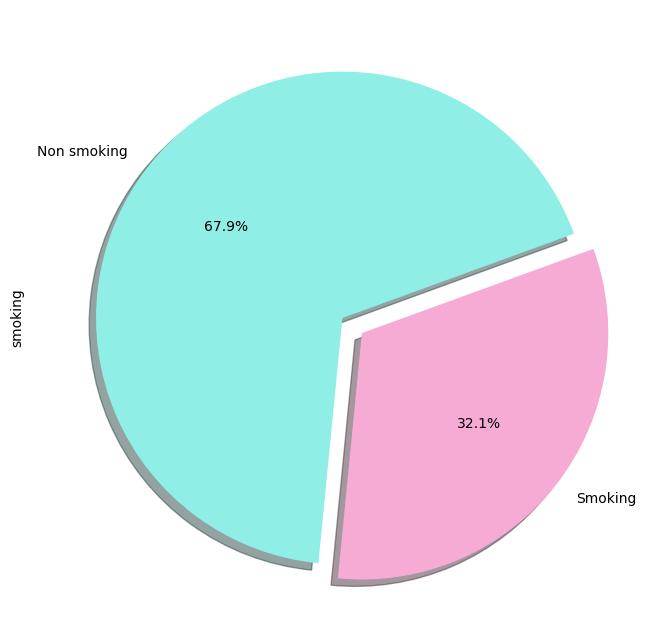

In [250]:
plt.figure(figsize=(10,8))
labels =  "Non smoking","Smoking"

cdf.smoking.value_counts().plot.pie( autopct='%1.1f%%', startangle = 20,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#F6ABD4'])

Text(0.5, 0, 'Count')

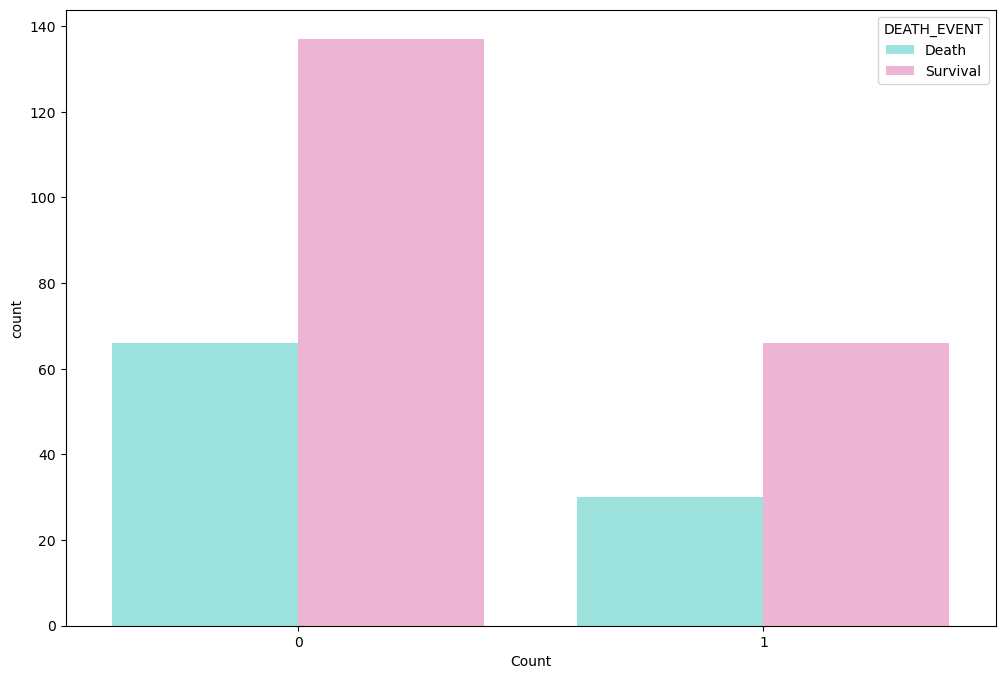

In [251]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='smoking', hue= 'DEATH_EVENT', palette=['#8FEFE6','#F6ABD4'])
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between creatinine phosphokinase and death event

<Figure size 2000x1000 with 0 Axes>

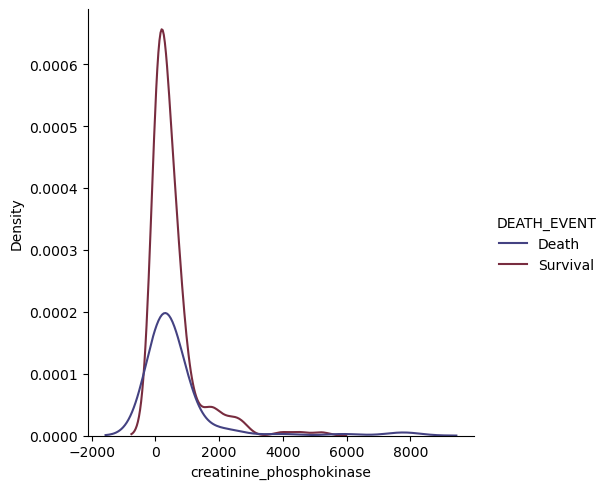

In [252]:
plt.figure(figsize=(20,10))
sns.displot(x='creatinine_phosphokinase', hue='DEATH_EVENT', data=cdf, palette='icefire', kind = 'kde')

### Relation between platelets and death event

<Figure size 2000x1000 with 0 Axes>

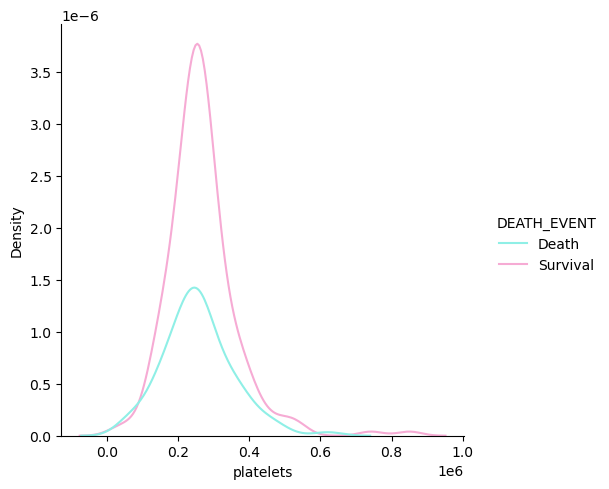

In [253]:
plt.figure(figsize=(20,10))
sns.displot(x='platelets', hue='DEATH_EVENT', data=cdf, palette=['#8FEFE6','#F6ABD4'], kind = 'kde')

### Relation between ejection fraction and death event

<Figure size 2000x1000 with 0 Axes>

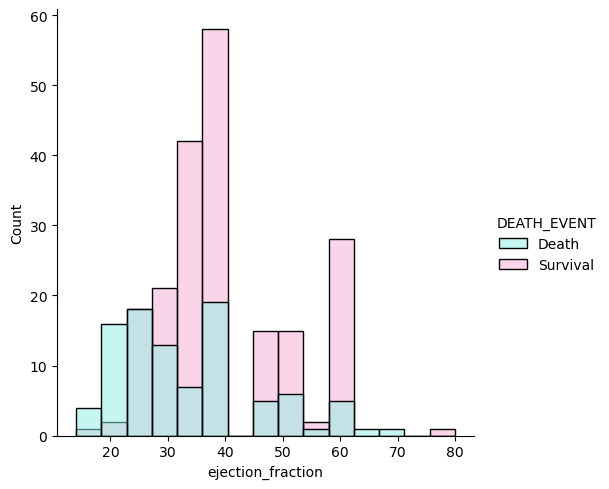

In [254]:
plt.figure(figsize=(20,10))
sns.displot(x='ejection_fraction', hue='DEATH_EVENT', data=cdf, palette=['#8FEFE6','#F6ABD4'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='count'>

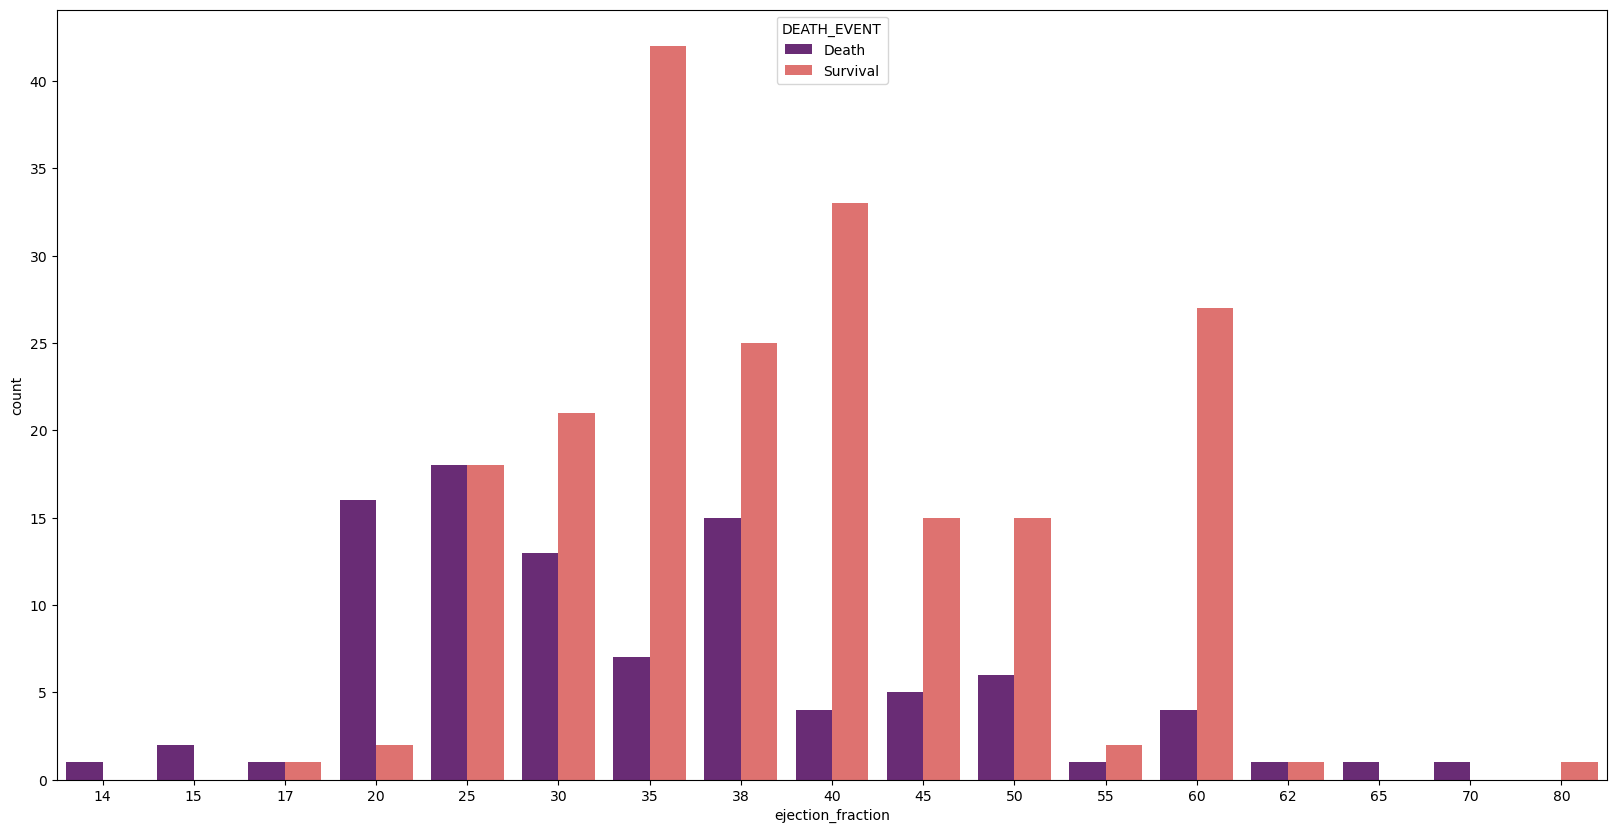

In [255]:

plt.figure(figsize=(20,10))
sns.countplot(x='ejection_fraction', hue='DEATH_EVENT', data=cdf, palette='magma')


### Relation between time and death event

<Figure size 2000x1000 with 0 Axes>

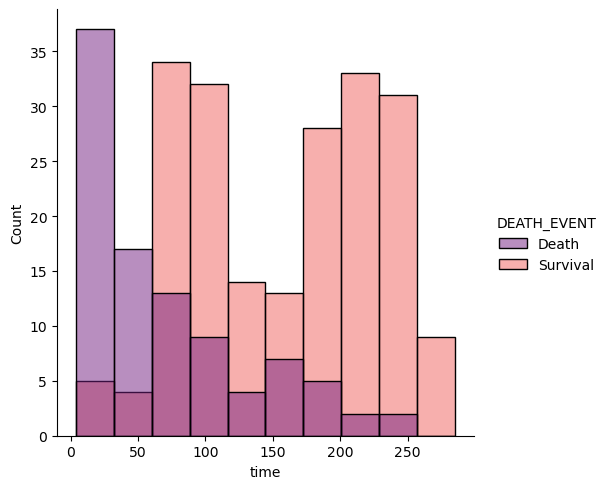

In [256]:
plt.figure(figsize=(20,10))
sns.displot(x='time', hue='DEATH_EVENT', data=cdf, palette='magma')

### Relation between serumcreatinine and death event

<Figure size 2000x1000 with 0 Axes>

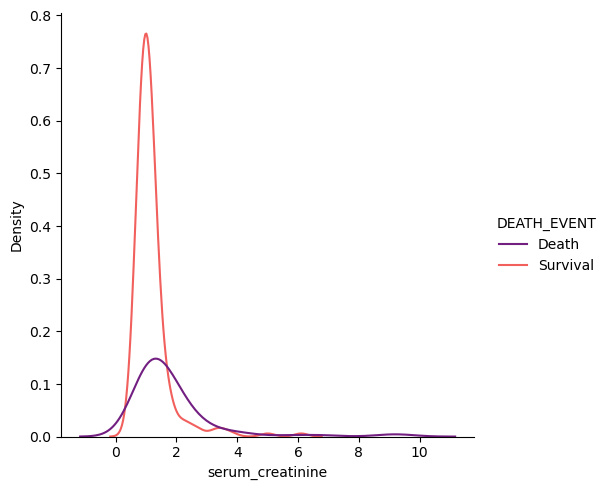

In [257]:
plt.figure(figsize=(20,10))
sns.displot(x='serum_creatinine', hue='DEATH_EVENT', data=cdf, palette='magma',kind='kde')

<AxesSubplot:xlabel='serum_creatinine', ylabel='count'>

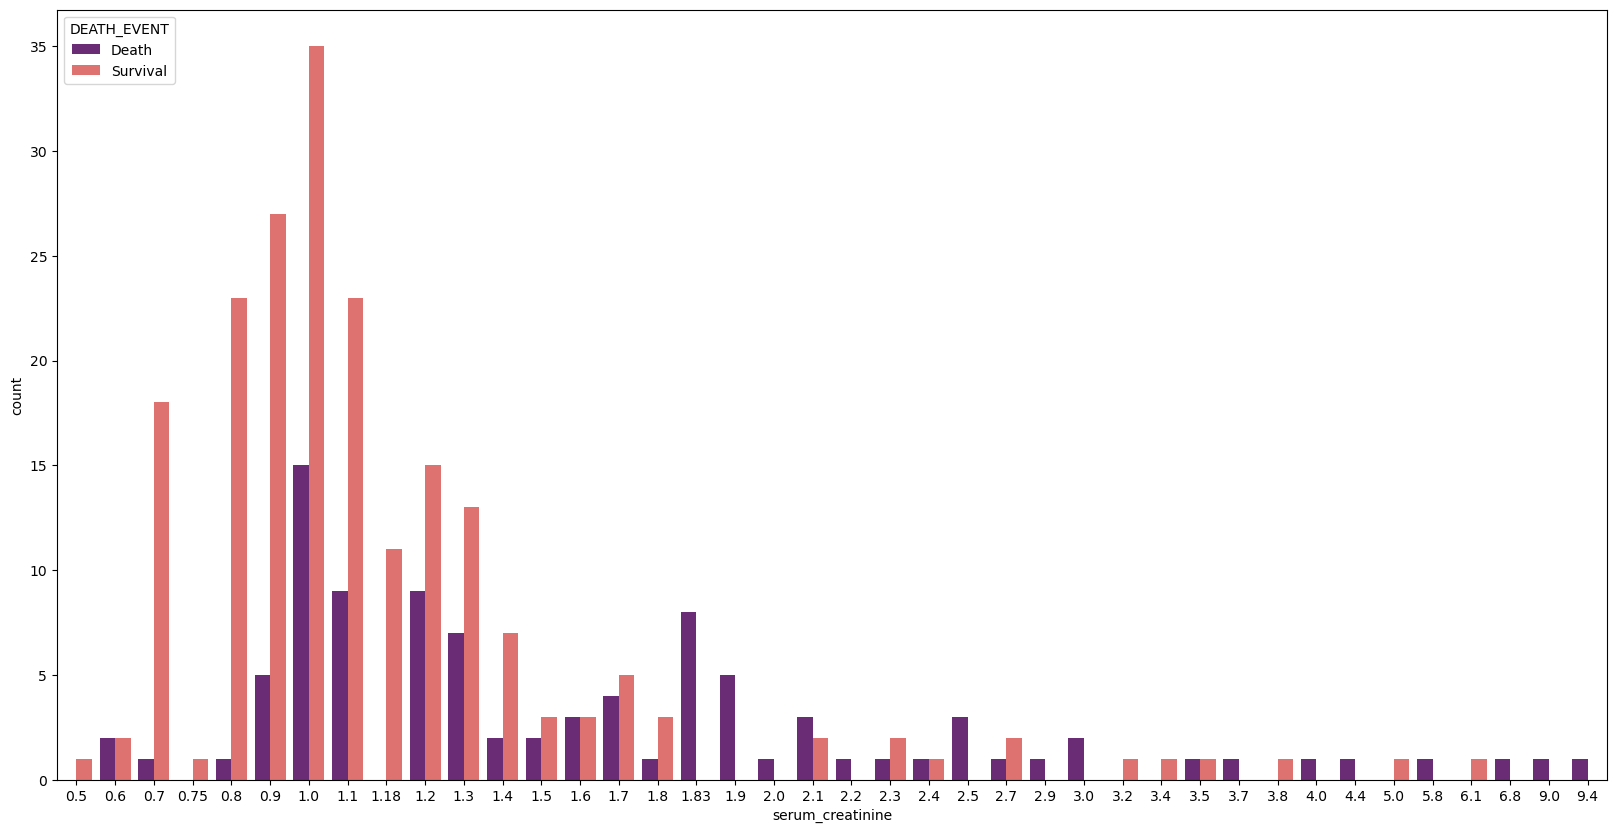

In [258]:
plt.figure(figsize=(20,10))
sns.countplot(x='serum_creatinine', hue='DEATH_EVENT', data=cdf, palette='magma')


### check for outliers

age                             AxesSubplot(0.125,0.77;0.168478x0.11)
anaemia                      AxesSubplot(0.327174,0.77;0.168478x0.11)
creatinine_phosphokinase     AxesSubplot(0.529348,0.77;0.168478x0.11)
diabetes                     AxesSubplot(0.731522,0.77;0.168478x0.11)
ejection_fraction              AxesSubplot(0.125,0.638;0.168478x0.11)
high_blood_pressure         AxesSubplot(0.327174,0.638;0.168478x0.11)
platelets                   AxesSubplot(0.529348,0.638;0.168478x0.11)
serum_creatinine            AxesSubplot(0.731522,0.638;0.168478x0.11)
serum_sodium                   AxesSubplot(0.125,0.506;0.168478x0.11)
sex                         AxesSubplot(0.327174,0.506;0.168478x0.11)
smoking                     AxesSubplot(0.529348,0.506;0.168478x0.11)
time                        AxesSubplot(0.731522,0.506;0.168478x0.11)
DEATH_EVENT                    AxesSubplot(0.125,0.374;0.168478x0.11)
dtype: object

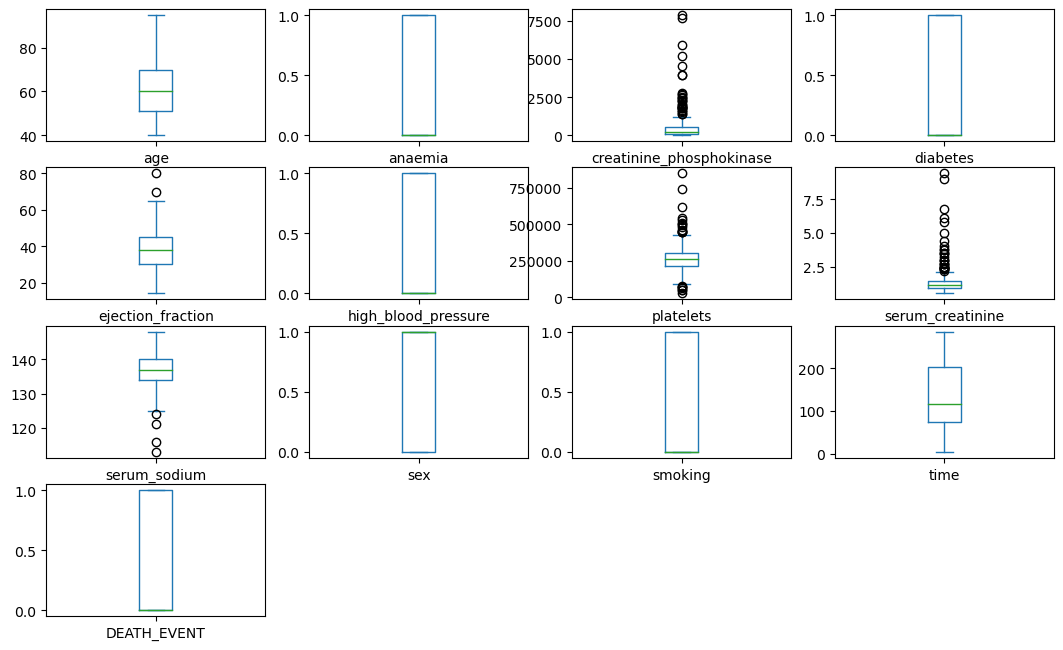

In [259]:
dataFrame.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

In [260]:
dataFrame=dataFrame[dataFrame['ejection_fraction']<65]
dataFrame=dataFrame[dataFrame['serum_sodium']>125]
dataFrame=dataFrame[dataFrame['serum_creatinine']<7.6]
dataFrame=dataFrame[dataFrame['platelets']<700000]

age                             AxesSubplot(0.125,0.77;0.168478x0.11)
anaemia                      AxesSubplot(0.327174,0.77;0.168478x0.11)
creatinine_phosphokinase     AxesSubplot(0.529348,0.77;0.168478x0.11)
diabetes                     AxesSubplot(0.731522,0.77;0.168478x0.11)
ejection_fraction              AxesSubplot(0.125,0.638;0.168478x0.11)
high_blood_pressure         AxesSubplot(0.327174,0.638;0.168478x0.11)
platelets                   AxesSubplot(0.529348,0.638;0.168478x0.11)
serum_creatinine            AxesSubplot(0.731522,0.638;0.168478x0.11)
serum_sodium                   AxesSubplot(0.125,0.506;0.168478x0.11)
sex                         AxesSubplot(0.327174,0.506;0.168478x0.11)
smoking                     AxesSubplot(0.529348,0.506;0.168478x0.11)
time                        AxesSubplot(0.731522,0.506;0.168478x0.11)
DEATH_EVENT                    AxesSubplot(0.125,0.374;0.168478x0.11)
dtype: object

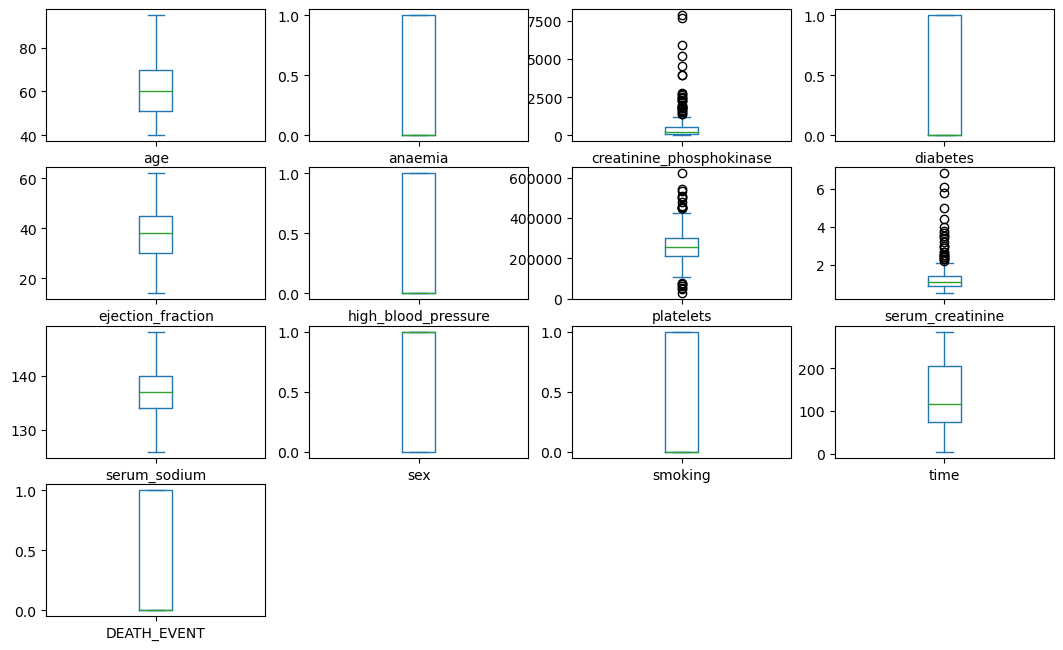

In [261]:
dataFrame.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

### Correlation:

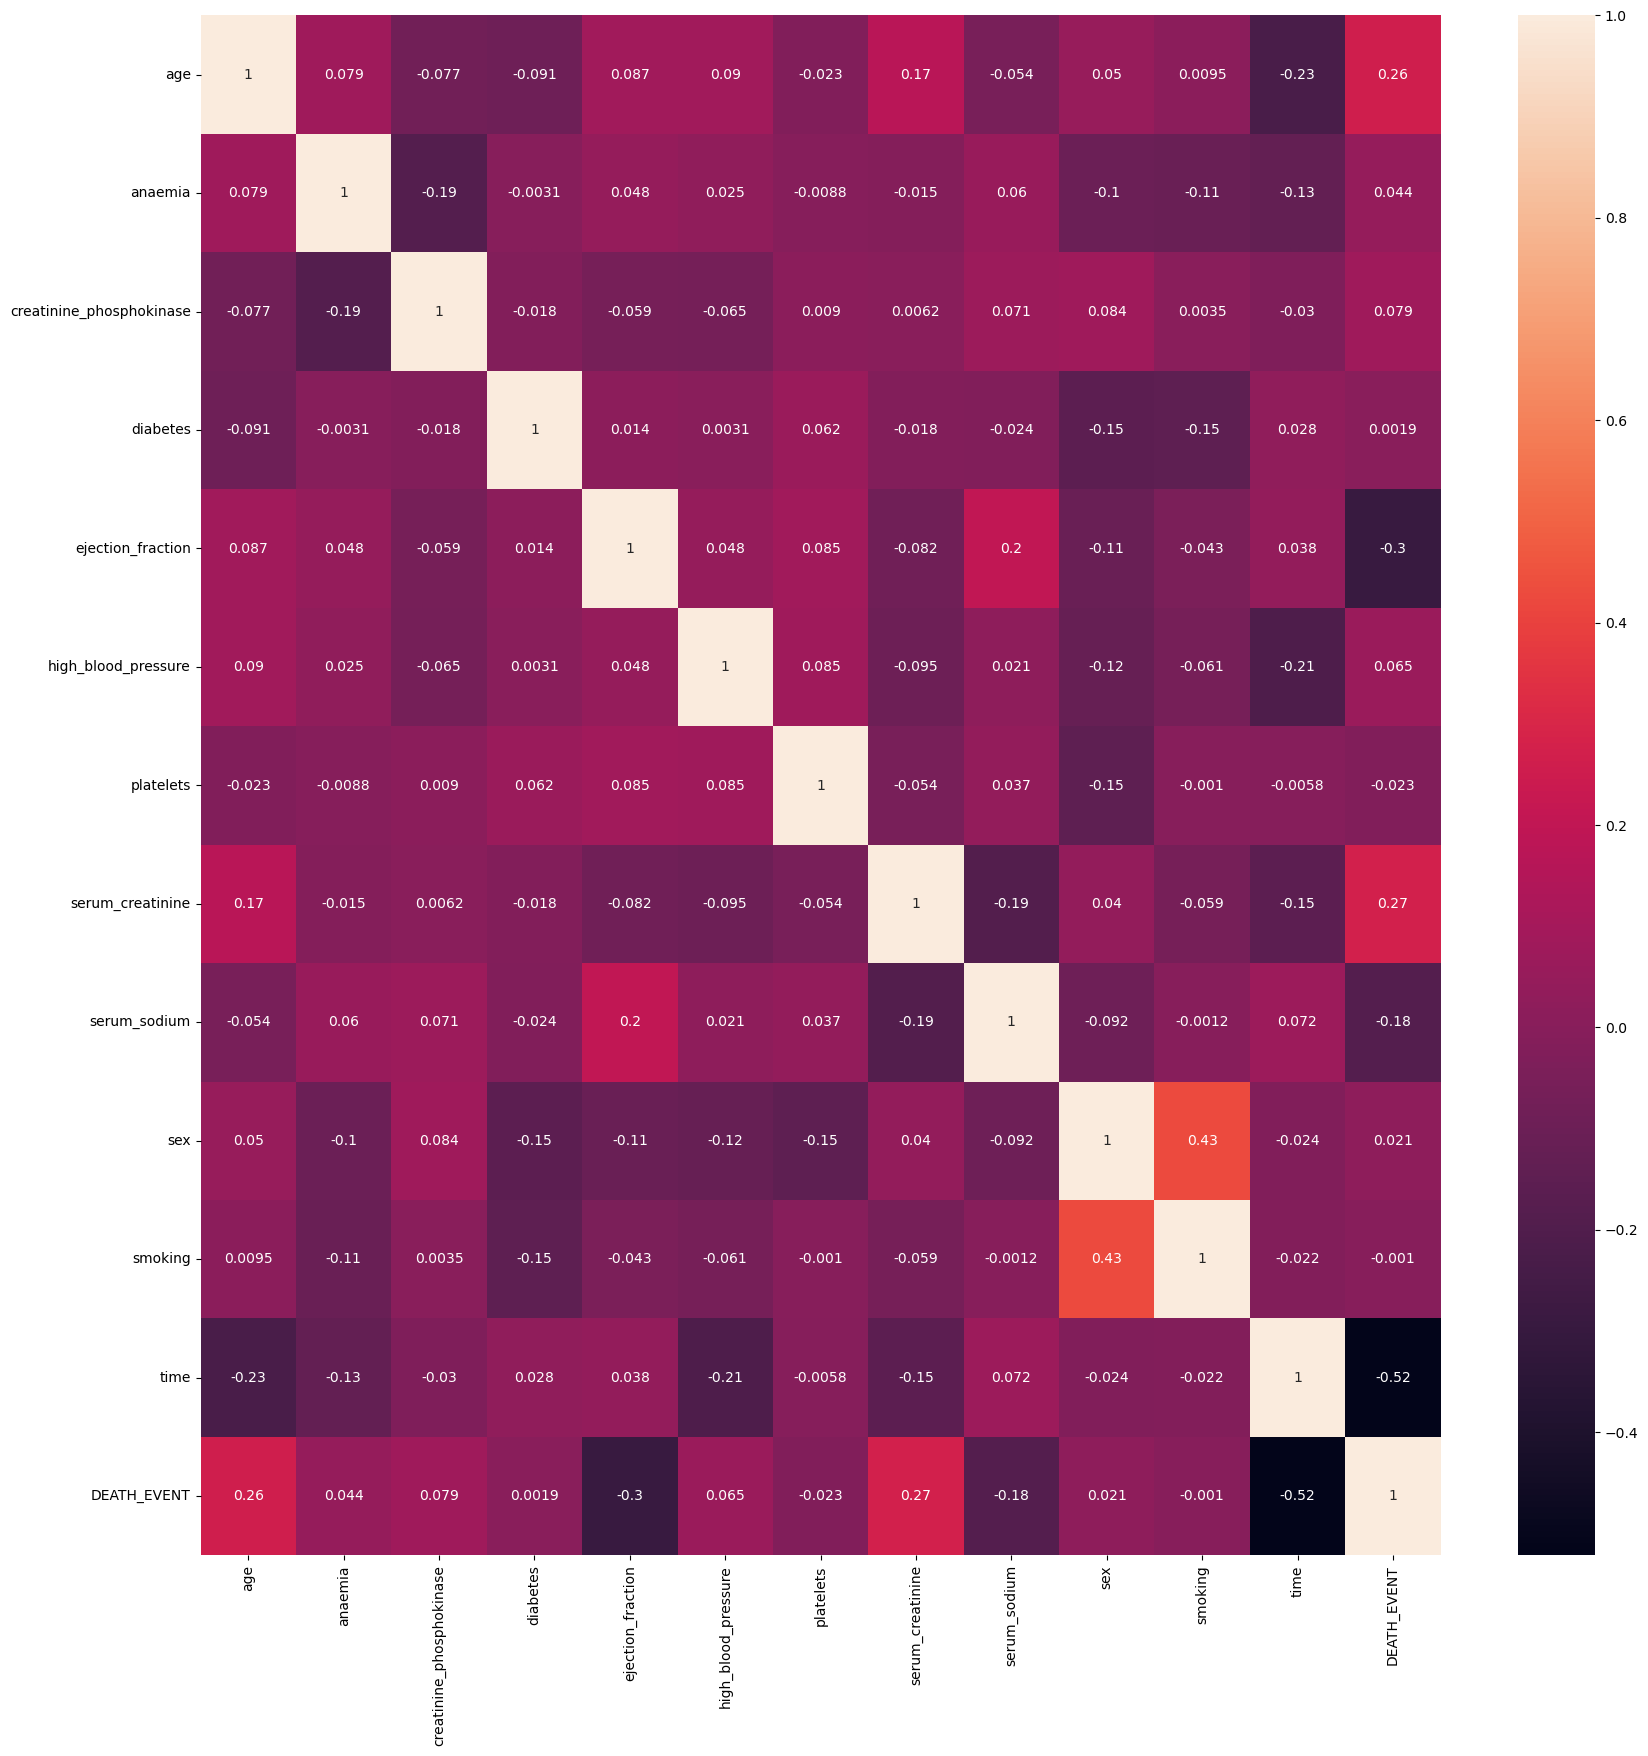

In [262]:
# Heatmap
corr_matrix = dataFrame.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

In [263]:
y= dataFrame['DEATH_EVENT']
x= dataFrame.drop(columns="DEATH_EVENT",axis=1)

                    features  importance
5        high_blood_pressure    0.011485
9                        sex    0.011502
10                   smoking    0.012425
1                    anaemia    0.013597
3                   diabetes    0.014328
8               serum_sodium    0.074619
2   creatinine_phosphokinase    0.081330
6                  platelets    0.083099
0                        age    0.094307
4          ejection_fraction    0.112859
7           serum_creatinine    0.130068
11                      time    0.360380


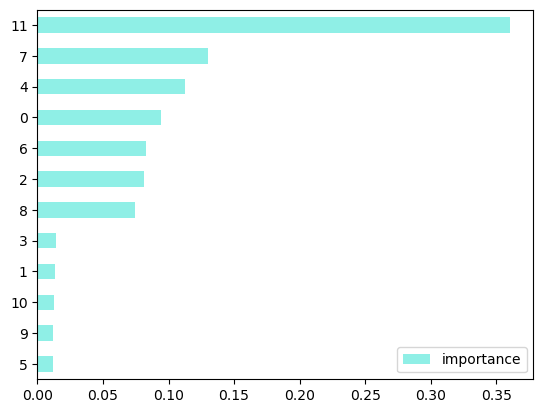

In [264]:
#Random Forests feature selection
rf = RandomForestClassifier(n_estimators=340)
rf.fit(x, y)
importance=rf.feature_importances_
feature=pd.DataFrame({"features":pd.DataFrame(x).columns,"importance":importance})
feature.set_index("importance")
feature=feature.sort_values("importance")
print(feature)
feature.plot(kind='barh',color=['#8FEFE6','#F6ABD4'])
plt.show()

### Model without cross validation

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [266]:
model = LogisticRegression()

In [267]:
model.fit(X_train, Y_train) 

LogisticRegression()

In [268]:
round(model.score(X_test, Y_test)*100,2)

81.61

### Apply Model function

In [269]:
def logistic_cross_validation(skf,x,y,model):
    lst_accu = []
    for train_index, test_index in skf.split(x, y): 
            X_train_fold, X_test_fold = x.iloc[train_index], x.iloc[test_index]
            y_train_fold, y_test_fold =  y.iloc[train_index], y.iloc[test_index]
            model.fit(X_train_fold, y_train_fold) 
            lst_accu.append(model.score(X_test_fold, y_test_fold))
    y_predict=model.predict(X_test_fold)
    return lst_accu,y_predict, y_test_fold

### confusion matrix Function

In [270]:
def plot_confusion(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Split data & cross validation on whole data

In [271]:
model_all = LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified=[]

In [272]:
 # Fit the model 
lst_accu_stratified,y_predict, y_test_fold=logistic_cross_validation(skf,x,y,model_all)

### Model accuracy 

In [273]:
print('Maximum Accuracy',round(max(lst_accu_stratified)*100,2))
print('Minimum Accuracy:',round(min(lst_accu_stratified)*100,2)) 
print('Overall Accuracy:',round(mean(lst_accu_stratified)*100,2))

Maximum Accuracy 86.21
Minimum Accuracy: 75.86
Overall Accuracy: 81.95


### Confusion Matrix

In [274]:
cf_matrix=confusion_matrix(y_test_fold,y_predict)
print('Confusion matrix\n',cf_matrix)

Confusion matrix
 [[18  1]
 [ 3  6]]


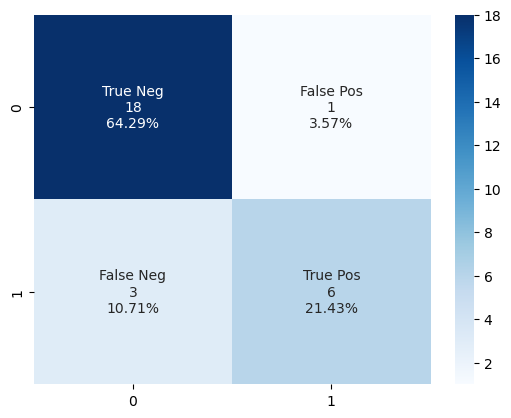

In [275]:
plot_confusion(cf_matrix)

### Classification Report

In [276]:
target_names = ['survive', 'Die']
print(classification_report(y_test_fold,y_predict,target_names=target_names))

              precision    recall  f1-score   support

     survive       0.86      0.95      0.90        19
         Die       0.86      0.67      0.75         9

    accuracy                           0.86        28
   macro avg       0.86      0.81      0.82        28
weighted avg       0.86      0.86      0.85        28



### Split data & cross validation on time ,serum ceratinine, ejection fraction

In [277]:
new_data= dataFrame[['time','serum_creatinine','ejection_fraction']]

In [278]:
new_data

,time,serum_creatinine,ejection_fraction
0,4,1.9,20
1,6,1.1,38
2,7,1.3,20
3,7,1.9,20
5,8,2.1,40
...,...,...,...
293,270,0.9,35
294,270,1.1,38
295,271,1.2,38
297,280,1.4,38


In [279]:
model_specific = LogisticRegression()
skf_specific = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratifiedNew = []

In [280]:
# Fit the model 
lst_accu_stratifiedNew,y_predict_specific, y_testSpecific_fold=logistic_cross_validation(skf_specific,new_data,y,model_specific)

### Model accuracy

In [281]:
print('Maximum Accuracy',round(max(lst_accu_stratifiedNew)*100,2)) 
print('Minimum Accuracy:',round(min(lst_accu_stratifiedNew)*100,2)) 
print('Overall Accuracy:',round(mean(lst_accu_stratifiedNew)*100,2))

Maximum Accuracy 92.86
Minimum Accuracy: 72.41
Overall Accuracy: 82.34


### Confusion matrix

In [282]:
cf_matrix_new=confusion_matrix(y_testSpecific_fold,y_predict_specific)
print('Confusion matrix\n',cf_matrix_new)

Confusion matrix
 [[17  2]
 [ 0  9]]


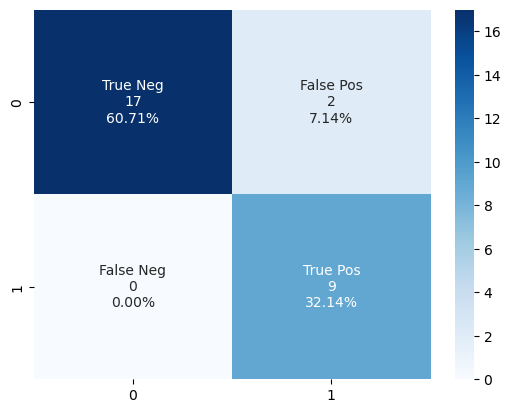

In [283]:
plot_confusion(cf_matrix_new)

### Classification report

In [284]:
target_names = ['survive', 'Die']
print(classification_report(y_testSpecific_fold,y_predict_specific,target_names=target_names))

              precision    recall  f1-score   support

     survive       1.00      0.89      0.94        19
         Die       0.82      1.00      0.90         9

    accuracy                           0.93        28
   macro avg       0.91      0.95      0.92        28
weighted avg       0.94      0.93      0.93        28

